In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_excel(r'Data\std_pca_100.xlsx')
test = pd.read_excel(r'Data\Test - Final Data - PCA - 100.xlsx')

In [3]:
X = train.drop(columns = ['label', 'id'])
y = train['label']

X_test = test.drop(columns = 'id')

In [5]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'minority').fit_resample(X,y)
print("Original training datapoints:", len(X))
print("SMOTE oversampled datapoints:",len(X_train))


Original training datapoints: 30000
SMOTE oversampled datapoints: 59028


In [6]:
y.value_counts()

0    29514
1      486
Name: label, dtype: int64

In [7]:
y_train.value_counts()

1    29514
0    29514
Name: label, dtype: int64

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


# Other Libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import make_scorer, confusion_matrix, auc, plot_roc_curve
from collections import Counter
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.classifier import ClassificationReport
from xgboost import XGBClassifier

In [9]:
import scikitplot as skplt
import matplotlib.pyplot as plt

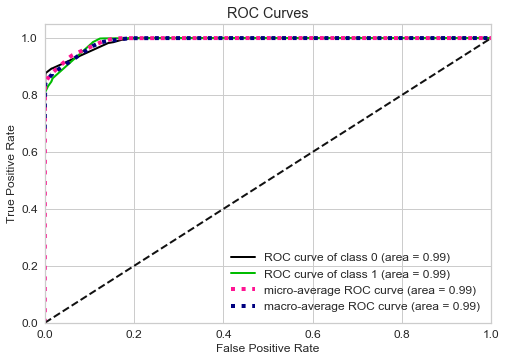

In [10]:
clf = RandomForestClassifier()
train_cv = cross_val_score(X=X_train,y=y_train,estimator=clf,scoring = 'roc_auc',cv=10)
clf.fit(X_train, y_train)
predicted_probas = clf.predict_proba(X_train)
y_true = y_train
y_probas = predicted_probas
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [11]:
X_train.shape

(59028, 100)

In [12]:
result = test[['id']]
result['label'] = clf.predict_proba(X_test)[:,1]

In [13]:
result.to_csv('Result\submit_RF_default_100d_pca_smote.csv', index = False)